In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
X = data.drop('target',axis=1)
Y = data.target

In [9]:
X.shape,Y.shape

((303, 13), (303,))

# Checking correlation between columns

In [10]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' and 'chol' are very weakly correlated.

# EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

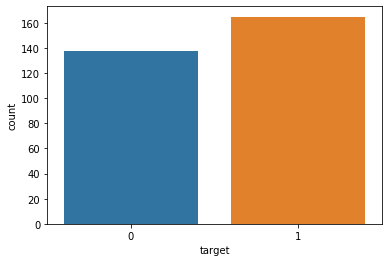

In [13]:
sns.countplot(Y)

In [14]:
Y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
print("Percentage of patience without heart problems: ",(Y==0).sum()*100/len(data))
print("Percentage of patience with severe heart problems: ",(Y==1).sum()*100/len(data))

Percentage of patience without heart problems:  45.54455445544554
Percentage of patience with severe heart problems:  54.45544554455446


Text(0, 0.5, 'Probability of People')

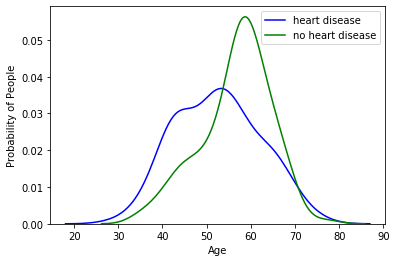

In [16]:
fig, ax = plt.subplots()

sns.kdeplot(data[data["target"]==1]["age"], color="blue", label="heart disease")
sns.kdeplot(data[data["target"]==0]["age"], color="green", label="no heart disease")
ax.set_xlabel("Age")
ax.set_ylabel("Probability of People")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Fitting

In [20]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_pred_LogReg = LogReg.predict(X_test)

In [22]:
print("The accuracy achieved using Logistic Regression is: ",end="")
LogRegscore=LogReg.score(X_test,Y_test)*100
print(LogRegscore)

The accuracy achieved using Logistic Regression is: 81.31868131868131


In [23]:
accuracy_score(Y_pred_LogReg,Y_test)*100

81.31868131868131

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)
Y_pred_NB = NB.predict(X_test)

In [25]:
print("The accuracy achieved using Naive Bayes is: ",end="")
NBscore=NB.score(X_test,Y_test)*100
print(NBscore)

The accuracy achieved using Naive Bayes is: 80.21978021978022


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for k in range(1, 20, 2):
    KNN = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(KNN, X_train, Y_train)
    print("value of k:",k," cross val score: ", score.mean()*100)

value of k: 1  cross val score:  73.13399778516057
value of k: 3  cross val score:  77.82945736434108
value of k: 5  cross val score:  80.21040974529345
value of k: 7  cross val score:  82.547065337763
value of k: 9  cross val score:  82.547065337763
value of k: 11  cross val score:  84.42967884828349
value of k: 13  cross val score:  83.02325581395348
value of k: 15  cross val score:  83.48837209302324
value of k: 17  cross val score:  82.08194905869324
value of k: 19  cross val score:  82.547065337763


In [27]:
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train,Y_train)
Y_pred_KNN=KNN.predict(X_test)
print("The accuracy achieved using KNN is: ",end="")
KNNscore=KNN.score(X_test,Y_test)*100
print(KNN.score(X_test,Y_test)*100)

The accuracy achieved using KNN is: 81.31868131868131


# Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier(random_state=0)
depth=[i+1 for i in range(10)]

criterion = ['gini', 'entropy']
min_samples_splits = np.linspace(0.1, 1.0,
                                 10, endpoint=True)
grid={'max_depth':depth, 'criterion':criterion, 'min_samples_split':min_samples_splits }
abc= GridSearchCV(DT,grid)
abc.fit(X_train,Y_train)

abc.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [169]:
dt_params=abc.best_params_
dt_params

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 0.1}

In [166]:
DT=DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=.1,random_state=0)
DT.fit(X_train,Y_train)
print("The accuracy achieved using DecisionTreeClassifier is: ",end="")
DTscore=DT.score(X_test,Y_test)*100
print(DTscore)

The accuracy achieved using DecisionTreeClassifier is: 75.82417582417582


# Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

RF=RandomForestClassifier(random_state=1)
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

grid={'max_depth':max_depths,'min_samples_split':min_samples_splits }
abc= GridSearchCV(RF,grid)
abc.fit(X_train,Y_train)
abc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2.0, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [172]:
RF_params=abc.best_params_
RF_params

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 0.1}

In [179]:
RF=RandomForestClassifier(random_state=1,max_depth=3,min_samples_split=.1)
RF.fit(X_train,Y_train)
print("The accuracy achieved using RandomForestClassifier is: ",end="")
RFscore=RF.score(X_test,Y_test)*100

print(RFscore)

The accuracy achieved using RandomForestClassifier is: 82.41758241758241


# SVM

In [34]:
from sklearn import svm

grid = {'C' : [1,10,25,50,75,1e2, 1e3],
       'gamma' : [1,.1,0.01,1e-3, 1e-4]}


SVM_clf = svm.SVC(kernel='linear')
abc = GridSearchCV(SVM_clf, grid)
abc.fit(X_train, Y_train)
abc.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
SVM_params=abc.best_params_
SVM_params

{'C': 1, 'gamma': 1}

In [42]:
SVM_clf = svm.SVC(kernel='linear',C=1,gamma=1)
SVM_clf.fit(X_train,Y_train)
print("The accuracy achieved using SVM is: ",end="")
SVMscore=SVM_clf.score(X_test,Y_test)*100
print(SVMscore)

The accuracy achieved using SVM is: 80.21978021978022


# XG Boost

In [60]:
import xgboost as xgb

XGB_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
XGB_clf.fit(X_train, Y_train)

print("The accuracy achieved using XGBoost is: ",end="")
XGBscore=XGB_clf.score(X_test,Y_test)*100
print(XGBscore)

The accuracy achieved using XGBoost is: 80.21978021978022


# Neural Network

In [147]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16,activation='relu',input_dim=13))
model.add(Dense(16,activation='tanh'))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=keras.regularizers.l1_l2(.001)))

model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

In [148]:
model.fit(X_train,Y_train,epochs=1000)

Y_pred_NN = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_NN]

Y_pred_NN = rounded

NNscore = accuracy_score(Y_pred_NN,Y_test)*100
NNscore

Epoch 1/1000
212/212 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.5189
Epoch 2/1000
212/212 [==============================] - 0s 69us/step - loss: 0.2704 - accuracy: 0.5283
Epoch 3/1000
212/212 [==============================] - 0s 104us/step - loss: 0.2677 - accuracy: 0.5330
Epoch 4/1000
212/212 [==============================] - 0s 85us/step - loss: 0.2649 - accuracy: 0.5330
Epoch 5/1000
212/212 [==============================] - 0s 87us/step - loss: 0.2624 - accuracy: 0.5519
Epoch 6/1000
212/212 [==============================] - 0s 83us/step - loss: 0.2599 - accuracy: 0.5660
Epoch 7/1000
212/212 [==============================] - 0s 83us/step - loss: 0.2573 - accuracy: 0.5802
Epoch 8/1000
212/212 [==============================] - 0s 87us/step - loss: 0.2549 - accuracy: 0.5849
Epoch 9/1000
212/212 [==============================] - 0s 95us/step - loss: 0.2527 - accuracy: 0.6038
Epoch 10/1000
212/212 [==============================] - 0s 83us/step - l

212/212 [==============================] - 0s 76us/step - loss: 0.1747 - accuracy: 0.7736
Epoch 80/1000
212/212 [==============================] - 0s 78us/step - loss: 0.1742 - accuracy: 0.7736
Epoch 81/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1736 - accuracy: 0.7736
Epoch 82/1000
212/212 [==============================] - 0s 78us/step - loss: 0.1731 - accuracy: 0.7736
Epoch 83/1000
212/212 [==============================] - 0s 192us/step - loss: 0.1726 - accuracy: 0.7736
Epoch 84/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1720 - accuracy: 0.7736
Epoch 85/1000
212/212 [==============================] - 0s 99us/step - loss: 0.1715 - accuracy: 0.7736
Epoch 86/1000
212/212 [==============================] - 0s 59us/step - loss: 0.1711 - accuracy: 0.7736
Epoch 87/1000
212/212 [==============================] - 0s 64us/step - loss: 0.1706 - accuracy: 0.7736
Epoch 88/1000
212/212 [==============================] - 0s 69us/step - loss:

212/212 [==============================] - 0s 73us/step - loss: 0.1468 - accuracy: 0.8302
Epoch 158/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1466 - accuracy: 0.8302
Epoch 159/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1464 - accuracy: 0.8302
Epoch 160/1000
212/212 [==============================] - 0s 83us/step - loss: 0.1462 - accuracy: 0.8302
Epoch 161/1000
212/212 [==============================] - 0s 66us/step - loss: 0.1460 - accuracy: 0.8302
Epoch 162/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1457 - accuracy: 0.8302
Epoch 163/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1455 - accuracy: 0.8302
Epoch 164/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1453 - accuracy: 0.8302
Epoch 165/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1451 - accuracy: 0.8302
Epoch 166/1000
212/212 [==============================] - 0s 76us/step

212/212 [==============================] - 0s 78us/step - loss: 0.1336 - accuracy: 0.8585
Epoch 236/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1335 - accuracy: 0.8585
Epoch 237/1000
212/212 [==============================] - 0s 78us/step - loss: 0.1334 - accuracy: 0.8585
Epoch 238/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1332 - accuracy: 0.8585
Epoch 239/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1331 - accuracy: 0.8585
Epoch 240/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1330 - accuracy: 0.8585
Epoch 241/1000
212/212 [==============================] - 0s 83us/step - loss: 0.1329 - accuracy: 0.8585
Epoch 242/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1328 - accuracy: 0.8585
Epoch 243/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1326 - accuracy: 0.8585
Epoch 244/1000
212/212 [==============================] - 0s 71us/step

212/212 [==============================] - 0s 83us/step - loss: 0.1254 - accuracy: 0.8679
Epoch 314/1000
212/212 [==============================] - 0s 83us/step - loss: 0.1253 - accuracy: 0.8679
Epoch 315/1000
212/212 [==============================] - 0s 80us/step - loss: 0.1252 - accuracy: 0.8679
Epoch 316/1000
212/212 [==============================] - 0s 83us/step - loss: 0.1251 - accuracy: 0.8679
Epoch 317/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1250 - accuracy: 0.8679
Epoch 318/1000
212/212 [==============================] - 0s 78us/step - loss: 0.1249 - accuracy: 0.8679
Epoch 319/1000
212/212 [==============================] - 0s 66us/step - loss: 0.1249 - accuracy: 0.8679
Epoch 320/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1248 - accuracy: 0.8679
Epoch 321/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1247 - accuracy: 0.8679
Epoch 322/1000
212/212 [==============================] - 0s 73us/step

212/212 [==============================] - 0s 85us/step - loss: 0.1195 - accuracy: 0.8774
Epoch 392/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1195 - accuracy: 0.8774
Epoch 393/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1194 - accuracy: 0.8774
Epoch 394/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1193 - accuracy: 0.8774
Epoch 395/1000
212/212 [==============================] - 0s 80us/step - loss: 0.1193 - accuracy: 0.8774
Epoch 396/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1192 - accuracy: 0.8774
Epoch 397/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1191 - accuracy: 0.8774
Epoch 398/1000
212/212 [==============================] - 0s 61us/step - loss: 0.1191 - accuracy: 0.8774
Epoch 399/1000
212/212 [==============================] - 0s 61us/step - loss: 0.1190 - accuracy: 0.8774
Epoch 400/1000
212/212 [==============================] - 0s 71us/step

212/212 [==============================] - 0s 80us/step - loss: 0.1151 - accuracy: 0.8821
Epoch 470/1000
212/212 [==============================] - 0s 88us/step - loss: 0.1150 - accuracy: 0.8821
Epoch 471/1000
212/212 [==============================] - 0s 87us/step - loss: 0.1150 - accuracy: 0.8821
Epoch 472/1000
212/212 [==============================] - 0s 64us/step - loss: 0.1149 - accuracy: 0.8868
Epoch 473/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1148 - accuracy: 0.8821
Epoch 474/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1148 - accuracy: 0.8821
Epoch 475/1000
212/212 [==============================] - 0s 78us/step - loss: 0.1147 - accuracy: 0.8868
Epoch 476/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1147 - accuracy: 0.8868
Epoch 477/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1146 - accuracy: 0.8868
Epoch 478/1000
212/212 [==============================] - 0s 78us/step

212/212 [==============================] - 0s 87us/step - loss: 0.1112 - accuracy: 0.8962
Epoch 548/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1111 - accuracy: 0.8962
Epoch 549/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1111 - accuracy: 0.8962
Epoch 550/1000
212/212 [==============================] - 0s 83us/step - loss: 0.1110 - accuracy: 0.8962
Epoch 551/1000
212/212 [==============================] - 0s 90us/step - loss: 0.1110 - accuracy: 0.8962
Epoch 552/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1109 - accuracy: 0.8962
Epoch 553/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1109 - accuracy: 0.9009
Epoch 554/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1108 - accuracy: 0.9009
Epoch 555/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1108 - accuracy: 0.9009
Epoch 556/1000
212/212 [==============================] - 0s 71us/step

212/212 [==============================] - 0s 80us/step - loss: 0.1075 - accuracy: 0.9057
Epoch 626/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1075 - accuracy: 0.9104
Epoch 627/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1075 - accuracy: 0.9104
Epoch 628/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1074 - accuracy: 0.9104
Epoch 629/1000
212/212 [==============================] - 0s 57us/step - loss: 0.1074 - accuracy: 0.9104
Epoch 630/1000
212/212 [==============================] - 0s 66us/step - loss: 0.1073 - accuracy: 0.9104
Epoch 631/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1073 - accuracy: 0.9104
Epoch 632/1000
212/212 [==============================] - 0s 71us/step - loss: 0.1073 - accuracy: 0.9104
Epoch 633/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1072 - accuracy: 0.9104
Epoch 634/1000
212/212 [==============================] - 0s 73us/step

212/212 [==============================] - 0s 73us/step - loss: 0.1046 - accuracy: 0.9104
Epoch 703/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1045 - accuracy: 0.9104
Epoch 704/1000
212/212 [==============================] - 0s 69us/step - loss: 0.1045 - accuracy: 0.9104
Epoch 705/1000
212/212 [==============================] - 0s 92us/step - loss: 0.1044 - accuracy: 0.9104
Epoch 706/1000
212/212 [==============================] - 0s 97us/step - loss: 0.1044 - accuracy: 0.9104
Epoch 707/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1044 - accuracy: 0.9104
Epoch 708/1000
212/212 [==============================] - 0s 80us/step - loss: 0.1043 - accuracy: 0.9104
Epoch 709/1000
212/212 [==============================] - 0s 114us/step - loss: 0.1043 - accuracy: 0.9104
Epoch 710/1000
212/212 [==============================] - 0s 114us/step - loss: 0.1043 - accuracy: 0.9104
Epoch 711/1000
212/212 [==============================] - 0s 92us/st

212/212 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.87 - 0s 83us/step - loss: 0.1019 - accuracy: 0.9104
Epoch 781/1000
212/212 [==============================] - 0s 76us/step - loss: 0.1018 - accuracy: 0.9104
Epoch 782/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1018 - accuracy: 0.9104
Epoch 783/1000
212/212 [==============================] - 0s 85us/step - loss: 0.1018 - accuracy: 0.9104
Epoch 784/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1017 - accuracy: 0.9104
Epoch 785/1000
212/212 [==============================] - 0s 99us/step - loss: 0.1017 - accuracy: 0.9104
Epoch 786/1000
212/212 [==============================] - 0s 104us/step - loss: 0.1017 - accuracy: 0.9104
Epoch 787/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1016 - accuracy: 0.9104
Epoch 788/1000
212/212 [==============================] - 0s 73us/step - loss: 0.1016 - accuracy: 0.9104
Epoch 789/1000
212/212 [===

212/212 [==============================] - 0s 71us/step - loss: 0.0995 - accuracy: 0.9104
Epoch 858/1000
212/212 [==============================] - 0s 78us/step - loss: 0.0994 - accuracy: 0.9104
Epoch 859/1000
212/212 [==============================] - 0s 85us/step - loss: 0.0994 - accuracy: 0.9104
Epoch 860/1000
212/212 [==============================] - 0s 76us/step - loss: 0.0994 - accuracy: 0.9104
Epoch 861/1000
212/212 [==============================] - 0s 80us/step - loss: 0.0994 - accuracy: 0.9104
Epoch 862/1000
212/212 [==============================] - 0s 73us/step - loss: 0.0993 - accuracy: 0.9104
Epoch 863/1000
212/212 [==============================] - 0s 76us/step - loss: 0.0993 - accuracy: 0.9104
Epoch 864/1000
212/212 [==============================] - 0s 80us/step - loss: 0.0993 - accuracy: 0.9104
Epoch 865/1000
212/212 [==============================] - 0s 83us/step - loss: 0.0992 - accuracy: 0.9104
Epoch 866/1000
212/212 [==============================] - 0s 78us/step

212/212 [==============================] - 0s 87us/step - loss: 0.0973 - accuracy: 0.9151
Epoch 936/1000
212/212 [==============================] - 0s 73us/step - loss: 0.0973 - accuracy: 0.9151
Epoch 937/1000
212/212 [==============================] - 0s 73us/step - loss: 0.0973 - accuracy: 0.9151
Epoch 938/1000
212/212 [==============================] - 0s 87us/step - loss: 0.0973 - accuracy: 0.9151
Epoch 939/1000
212/212 [==============================] - 0s 102us/step - loss: 0.0973 - accuracy: 0.9151
Epoch 940/1000
212/212 [==============================] - 0s 83us/step - loss: 0.0972 - accuracy: 0.9151
Epoch 941/1000
212/212 [==============================] - 0s 80us/step - loss: 0.0972 - accuracy: 0.9151
Epoch 942/1000
212/212 [==============================] - 0s 78us/step - loss: 0.0972 - accuracy: 0.9151
Epoch 943/1000
212/212 [==============================] - 0s 83us/step - loss: 0.0971 - accuracy: 0.9151
Epoch 944/1000
212/212 [==============================] - 0s 76us/ste

89.01098901098901

## scores


In [149]:

scores = [LogRegscore,NBscore,SVMscore,KNNscore,DTscore,RFscore,XGBscore,NNscore]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 81.31868131868131 %
The accuracy score achieved using Naive Bayes is: 80.21978021978022 %
The accuracy score achieved using Support Vector Machine is: 80.21978021978022 %
The accuracy score achieved using K-Nearest Neighbors is: 81.31868131868131 %
The accuracy score achieved using Decision Tree is: 75.82417582417582 %
The accuracy score achieved using Random Forest is: 84.61538461538461 %
The accuracy score achieved using XGBoost is: 80.21978021978022 %
The accuracy score achieved using Neural Network is: 89.01098901098901 %


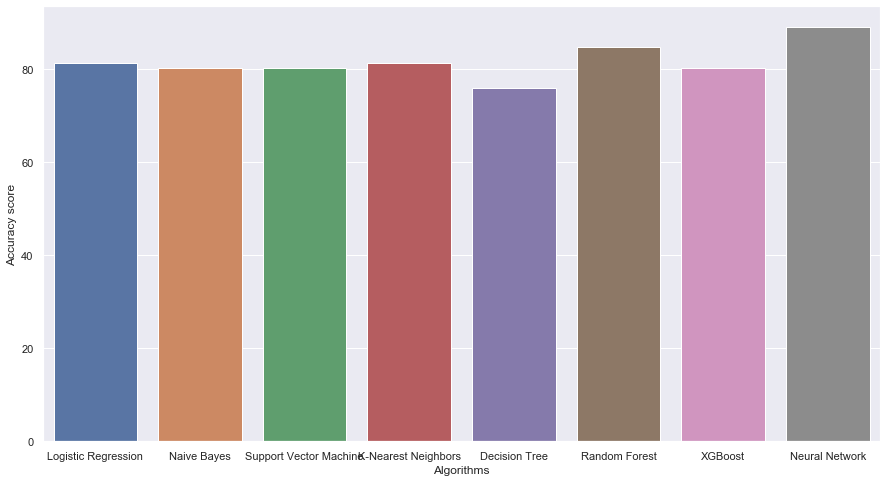

In [151]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")


sns.barplot(algorithms,scores)